In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d elinachen717/municipal-solid-waste-dataset

Dataset URL: https://www.kaggle.com/datasets/elinachen717/municipal-solid-waste-dataset
License(s): CC0-1.0
 62% 3.00M/4.81M [00:00<00:00, 5.33MB/s]
100% 4.81M/4.81M [00:00<00:00, 6.64MB/s]


In [ ]:
 !unzip  /content/municipal-solid-waste-dataset.zip

Archive:  /content/municipal-solid-waste-dataset.zip
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_0.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_10.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_100.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1000.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1004.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1005.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1007.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1008.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1009.jpeg  
  inflating: Dataset/Biodegradable Images/TRAIN.1_BIODEG_ORI_10035.jpg  
  inflating: Dataset/Biodegradable Images/TRAIN.2_BIODEG_ORI_10025.jpg  
  inflating: Dataset/Biodegradable Images/TRAIN.2_BIODEG_ORI_10043.jpg  
  inflating: Dataset/Biodegradable Im

In [ ]:
import os
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
!pip install Augmentor

In [ ]:


# Set the path to the dataset
dataset_dir = '/content/Dataset'
classes = os.listdir(dataset_dir)

# Create directories for train, val, and test sets
output_dir = 'output_dataset'
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)

for cls in classes:
    os.makedirs(os.path.join(output_dir, 'train', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', cls), exist_ok=True)

    class_dir = os.path.join(dataset_dir, cls)
    images = os.listdir(class_dir)

    print(cls,len(images))

    train_and_val_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    train_images, val_images = train_test_split(train_and_val_images, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

    # Copy images to respective directories
    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'train', cls, img))
    for img in val_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'val', cls, img))
    for img in test_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'test', cls, img))

print("Dataset split into training, validation, and test sets.")


Biodegradable Images 130
Recyclable Images 130
Trash Images 130
Dataset split into training, validation, and test sets.


In [ ]:

# Define directories
dataset_dir = '/content/output_dataset'
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

# Define image size expected by the pre-trained model
IMG_SIZE = (224, 224)  # Common size for many models like ResNet, VGG, MobileNet

# Create ImageDataGenerators for resizing and augmenting the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load and resize the images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'  # Assuming binary classification for healthy vs rotten
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Do not shuffle test data
)

# Print class indices for reference
print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)


Found 234 images belonging to 3 classes.
Found 78 images belonging to 3 classes.
Found 78 images belonging to 3 classes.
{'Biodegradable Images': 0, 'Recyclable Images': 1, 'Trash Images': 2}
{'Biodegradable Images': 0, 'Recyclable Images': 1, 'Trash Images': 2}
{'Biodegradable Images': 0, 'Recyclable Images': 1, 'Trash Images': 2}


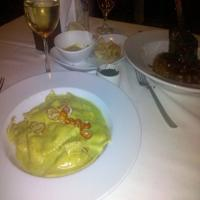

In [ ]:
import random
from IPython.display import Image, display

# Specify the path to your image folder
folder_path = '/content/output_dataset/train/Biodegradable Images'  # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

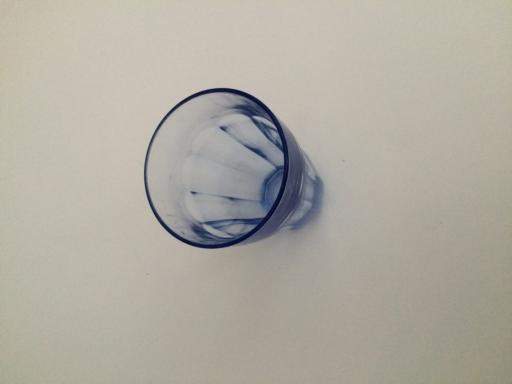

In [ ]:
folder_path = '/content/output_dataset/test/Recyclable Images'  # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

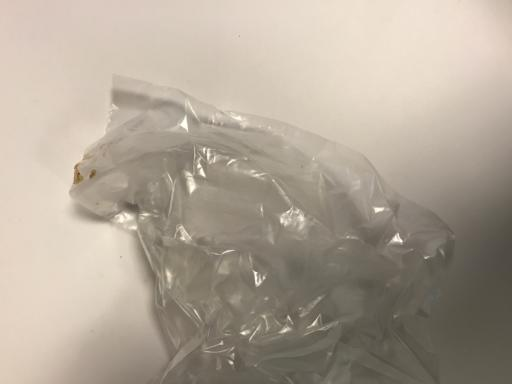

In [ ]:
folder_path = '/content/output_dataset/test/Trash Images'  # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

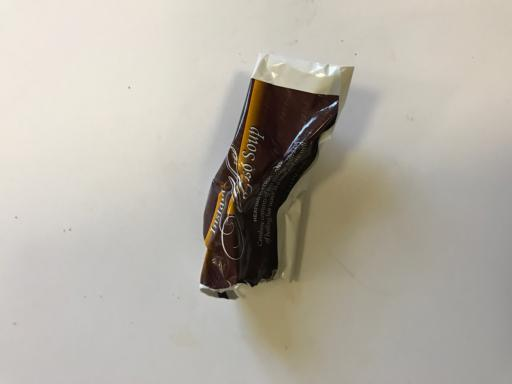

In [ ]:
folder_path = '/content/output_dataset/train/Trash Images'  # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

In [ ]:
trainpath = "/content/output_dataset/train"
testpath="/content/output_dataset/test"

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range= 0.2,shear_range= 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train = train_datagen.flow_from_directory(trainpath,target_size =(224,224),batch_size = 20)
test = test_datagen.flow_from_directory(testpath,target_size =(224,224),batch_size = 20)

Found 234 images belonging to 3 classes.
Found 78 images belonging to 3 classes.


# **vgg16**

In [ ]:
vgg = VGG16(include_top = False,input_shape = (224,224,3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
for layer in vgg.layers:
  print(layer)

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
x= Flatten()(vgg.output)

In [ ]:
output = Dense(3, activation ='softmax')(x)

In [ ]:
vgg16 = Model(vgg.input,output)

In [ ]:
vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
opt = Adam(lr=0.0001)

# Assuming you have defined your VGG16 model as vgg16

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Compile the model (you may have already done this)
vgg16.compile(optimizer = 'Adam' , loss='categorical_crossentropy', metrics=['accuracy'])


# # Train the model with early stopping callback
history = vgg16.fit(train, validation_data=test,
                    epochs=10,

                   steps_per_epoch=5,
                 callbacks=[early_stopping])

Epoch 1/10
5/5 [==============================] - 120s 24s/step - loss: 1.4950 - accuracy: 0.5300 - val_loss: 1.1408 - val_accuracy: 0.5513
Epoch 2/10
5/5 [==============================] - 111s 25s/step - loss: 0.7526 - accuracy: 0.6600 - val_loss: 0.7541 - val_accuracy: 0.6667
Epoch 3/10
5/5 [==============================] - 105s 23s/step - loss: 0.5088 - accuracy: 0.7766 - val_loss: 0.6151 - val_accuracy: 0.6923
Epoch 4/10
5/5 [==============================] - 107s 24s/step - loss: 0.3544 - accuracy: 0.8936 - val_loss: 0.6226 - val_accuracy: 0.7821
Epoch 5/10
5/5 [==============================] - 104s 23s/step - loss: 0.2693 - accuracy: 0.8936 - val_loss: 0.9809 - val_accuracy: 0.7051
Epoch 6/10
5/5 [==============================] - 108s 24s/step - loss: 0.2384 - accuracy: 0.9300 - val_loss: 0.8708 - val_accuracy: 0.7179
Epoch 7/10
5/5 [==============================] - 116s 26s/step - loss: 0.1812 - accuracy: 0.9500 - val_loss: 0.6773 - val_accuracy: 0.7436


In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
labels=[0,1,2]

# **Test-1**

In [ ]:
img_path ='/content/output_dataset/train/Biodegradable Images/TEST_BIODEG_HFL_10.jpeg'

In [ ]:
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 [==============================] - 1s 1s/step


array([[1., 0., 0.]], dtype=float32)

In [ ]:
labels[np.argmax(preds)]

0

# **Test-2**

In [ ]:
img_path ='/content/output_dataset/test/Recyclable Images/cardboard134.jpeg'

In [ ]:
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 [==============================] - 1s 584ms/step


array([[1.9529088e-21, 4.3498831e-17, 1.0000000e+00]], dtype=float32)

In [ ]:
labels[np.argmax(preds)]

2

# **Test-3**

In [ ]:
img_path='/content/output_dataset/train/Trash Images/TRAIN.4_NBIODEG_CCW_1491.jpg'

In [ ]:
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 [==============================] - 1s 532ms/step


array([[4.3134577e-20, 1.0559779e-13, 1.0000000e+00]], dtype=float32)

In [ ]:
labels[np.argmax(preds)]

2

# **Test-4**

In [ ]:
img_path='/content/output_dataset/test/Biodegradable Images/TRAIN.2_BIODEG_ORI_10149.jpg'

In [ ]:
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 [==============================] - 1s 985ms/step


array([[1., 0., 0.]], dtype=float32)

In [ ]:
labels[np.argmax(preds)]

0

# **Test-5**

In [ ]:
img_path='/content/output_dataset/train/Recyclable Images/paper123.jpeg'

In [ ]:

img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 [==============================] - 1s 532ms/step


array([[1.1714678e-28, 4.7260136e-14, 1.0000000e+00]], dtype=float32)

In [ ]:
labels[np.argmax(preds)]

2

In [ ]:
vgg16.save('vgg16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
